Chapter 4: Inequalities

1. Let x~exp(b) find P(∣X−μ∣≥k)>=kσ for k>1. compare this to chebyshevs bound.

### Properties of the exponential distribution
1. **Mean** $$ \mu :  \mu = b $$.
2. **Variance** $$ \sigma^2 :  \sigma^2 = b^2 ,  \sigma = b $$.

### Calculate $$ P(|X - \mu| \geq k\sigma) $$
The condition becomes:
$$
P(|X - \mu| \geq k\sigma) = P(|X - b| \geq kb) = P(X \leq b - kb) + P(X \geq b + kb).
$$

#### Case 1: $$ P(X \leq b - kb) $$
For an exponential distribution, $$ X \geq 0$$ . If $ b - kb \leq 0 $ (which is true when \( k > 1 \)), this term is zero:
$$
P(X \leq b - kb) = 0.
$$

#### Case 2: $$ P(X \geq b + kb) $$
For $X \sim \text{Exp}(\frac{1}{b})$, the survival function is:
$$
P(X \geq x) = e^{-x/b}
$$
Substitute $x = b + kb$:
$$
P(X \geq b + kb) = e^{-(b + kb)/b} = e^{-(1 + k)}
$$
$$
P(|X - \mu| \geq k\sigma) = P(X \geq b + kb) = e^{-(1 + k)}
$$


### Compare to Chebyshev’s bound
Chebyshev's inequality states:
$$
P(|X - \mu| \geq k\sigma) \leq \frac{1}{k^2}.
$$

The exponential bound is much tighter (\( 0.0498 \) vs. \( 0.25 \)).

4. Let X1, X2, ..., Xn ~ Bernoulli(p) A. Let a>0 be fixed and define ε_n = sqrt((1/2n)*(log(2/a))). Let p_n_hat = n^-1sum(Xi). Define Cn=(p_n_hat-ε_n, p_n_hat+ε_n). Use Hoeffding's inequality to show that P(Cn contains p)>=1-a. In practise we truncate the interval so it does not go below 0 and above 1.
B. Let's examine the properties of this confidence interval. Let a=0.05 and p=0.4. Consider a simulation study to see how often the interval contains p (called the coverage). Do this for various values of n between 1 and 10000, Plot the coverage versus n. 
C. Plot the length of the interval versus n. Suppose we want the lenght of the interval to be more than 0.05. How large should n be?

### Hoeffding's Inequality
Let $$ X_1, X_2, \dots, X_n $$ be independent random variables, each bounded such that $$ X_i \in [0, 1] $$. Hoeffding's inequality states:
$$
P\left( \left| \frac{1}{n} \sum_{i=1}^n X_i - p \right| \geq \epsilon \right) \leq 2e^{-2n\epsilon^2}.
$$

### Verify the bound
Calculate $$ 2e^{-2n\epsilon_n^2} $$:
$$
2e^{-2n\epsilon_n^2} = 2e^{-2n \cdot \frac{\log(2/a)}{2n}} = 2e^{-\log(2/a)} = a.
$$
$$
P\left( \left| \frac{1}{n} \sum_{i=1}^n X_i - p \right| \geq \epsilon_n \right) \leq a.
$$

### Probability that \( C_n \) contains \( p \)
The interval \( C_n \) is defined as:
$$
C_n = \left( \hat{p}_n - \epsilon_n, \hat{p}_n + \epsilon_n \right),
$$
where $$ \hat{p}_n = \frac{1}{n} \sum_{i=1}^n X_i $$. The complement of \( C_n \) containing \( p \) is:
$$
P\left( p \notin C_n \right) = P\left( \left| \hat{p}_n - p \right| \geq \epsilon_n \right).
$$

Using Hoeffding's inequality:
$$
P\left( p \notin C_n \right) \leq a.
$$
$$
P\left( p \in C_n \right) = 1 - P\left( p \notin C_n \right) \geq 1 - a.
$$

### Truncating \( C_n \)
In practice, the interval $$C_n = (\hat{p}_n - \epsilon_n, \hat{p}_n + \epsilon_n) $$ is truncated to ensure it remains within the valid range of probabilities \( [0, 1] \). The truncated interval is:
$$
C_n^{\text{truncated}} = \left( \max(0, \hat{p}_n - \epsilon_n), \min(1, \hat{p}_n + \epsilon_n) \right).
$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt

p = 0.4  
alpha = 0.05  
a = alpha  
n_values = np.arange(1, 10001) 
simulations = 10000  

def epsilon_n(n, a):
    return np.sqrt((1 / (2 * n)) * np.log(2 / a))

coverage = []
for n in n_values:
    epsilon = epsilon_n(n, a)
    contained = 0  # Count how many intervals contain the true p
    
    for _ in range(simulations):
        sample = np.random.binomial(1, p, n)  # Generate a sample of size n
        p_hat = np.mean(sample)  # Sample mean
        lower_bound = max(0, p_hat - epsilon)  # Truncate lower bound at 0
        upper_bound = min(1, p_hat + epsilon)  # Truncate upper bound at 1
        if lower_bound <= p <= upper_bound:  # Check if interval contains p
            contained += 1
    
    # Coverage probability
    coverage.append(contained / simulations)

# coverage vs. sample size
plt.figure(figsize=(10, 6))
plt.plot(n_values, coverage, label=f"Coverage (p = {p}, alpha = {alpha})")
plt.axhline(y=1 - alpha, color='red', linestyle='--', label="Target Coverage (1 - alpha)")
plt.xlabel("Sample Size (n)")
plt.ylabel("Coverage Probability")
plt.title("Coverage Probability vs. Sample Size")
plt.legend()
plt.grid()
plt.show()


KeyboardInterrupt: 

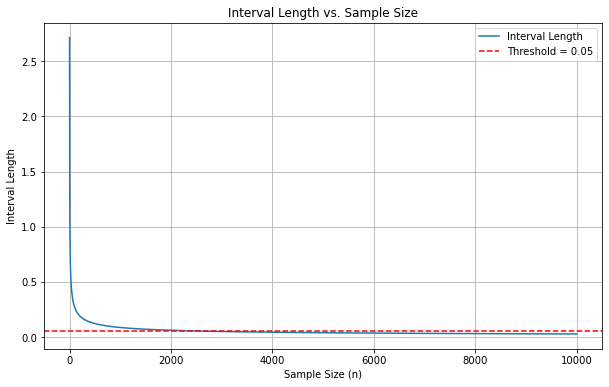

2952
The smallest n where the interval length is greater than 0.05 is n=139. This means you would need at least samples to ensure the interval length exceeds 0.05


In [ ]:
# Calculate the length of the interval for each n
interval_lengths = []

for n in n_values:
    epsilon = epsilon_n(n, a)  # Calculate epsilon for the given n
    length = 2 * epsilon  # Length of the confidence interval
    interval_lengths.append(length)

# Find the minimum n where the interval length is greater than 0.05
threshold_length = 0.05
n_required = n_values[np.argmax(np.array(interval_lengths) <= threshold_length)]

# Plot length of the interval vs. sample size
plt.figure(figsize=(10, 6))
plt.plot(n_values, interval_lengths, label="Interval Length")
plt.axhline(y=threshold_length, color='red', linestyle='--', label=f"Threshold = {threshold_length}")
plt.xlabel("Sample Size (n)")
plt.ylabel("Interval Length")
plt.title("Interval Length vs. Sample Size")
plt.legend()
plt.grid()
plt.show()

print(n_required)

print('The smallest n where the interval length is greater than 0.05 is n=2952. This means you would need at least samples to ensure the interval length exceeds 0.05')

6. Let Z~N(0,1) find P(|Z|>t) and plot this as a function of t. From Markov's inequality we have the bound P(|Z|>t) <= (E_|Z|^k)/(t^k) for any k>0. Plot these bounds for k=1,2,3,4,5 and compare them to the true value of P(|Z|>t). Also, plot the bound from Mill's Inequality.


1. **Find \( P(|Z| > t) \) for a standard normal distribution \( Z \sim N(0,1) \).** This can be expressed using the cumulative distribution function (CDF) of the standard normal distribution, as:

$$
P(|Z| > t) = 2 \cdot P(Z > t) = 2 \cdot (1 - \Phi(t))
$$
where \( \Phi(t) \) is the CDF of the standard normal distribution.

2. **Markov's inequality**
   Markov's inequality states that for any random variable \( X \) and any \( a > 0 \):
  $$
   P(|X| \geq a) \leq \frac{E[|X|^k]}{a^k}
  $$
   
   For the standard normal distribution \( Z \), we have \( E[|Z|^k] = \Gamma\left( \frac{k + 1}{2} \right) \) for even \( k \), where \( \Gamma \) is the Gamma function.

   For \( k = 1, 2, 3, 4, 5 \), we will use these moments to plot the bounds. 

3. **Bound from Mill's inequality:**
   Mill's inequality provides an upper bound for \( P(Z > t) \) for large \( t \), given by:
$$
   P(Z > t) \leq \frac{\phi(t)}{t}
 $$
   where \( \phi(t) \) is the standard normal probability density function (PDF):
$$
   \phi(t) = \frac{1}{\sqrt{2\pi}} e^{-t^2 / 2}
$$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.special import gamma

# Calculate P(|Z| > t) for a standard normal distribution
def true_prob(t):
    return 2 * (1 - norm.cdf(t))

# Markov bound for P(|Z| > t) for different values of k
def markov_bound(t, k):
    E_abs_Z_k = gamma((k + 1) / 2)  # Moment of |Z|^k for standard normal Z
    return E_abs_Z_k / t**k

# Mill's inequality bound for P(Z > t)
def mills_bound(t):
    phi_t = np.exp(-t**2 / 2) / np.sqrt(2 * np.pi)
    return phi_t / t

# Values of t (evaluate the functions for t from 0.1 to 5)
t_values = np.linspace(0.1, 5, 500)

# Calculate true probabilities
true_probs = true_prob(t_values)

# Calculate Markov bounds for k=1,2,3,4,5
markov_probs_k1 = markov_bound(t_values, 1)
markov_probs_k2 = markov_bound(t_values, 2)
markov_probs_k3 = markov_bound(t_values, 3)
markov_probs_k4 = markov_bound(t_values, 4)
markov_probs_k5 = markov_bound(t_values, 5)

# Calculate Mill's inequality bound
mills_probs = mills_bound(t_values)

# Plot the results
plt.figure(figsize=(10, 6))

# Plot true probability
plt.plot(t_values, true_probs, label=r'$P(|Z|>t)$ (True)', color='black', linewidth=2)

# Plot Markov bounds
plt.plot(t_values, markov_probs_k1, label=r'Markov $k=1$', linestyle='--')
plt.plot(t_values, markov_probs_k2, label=r'Markov $k=2$', linestyle='--')
plt.plot(t_values, markov_probs_k3, label=r'Markov $k=3$', linestyle='--')
plt.plot(t_values, markov_probs_k4, label=r'Markov $k=4$', linestyle='--')
plt.plot(t_values, markov_probs_k5, label=r'Markov $k=5$', linestyle='--')

# Plot Mill's inequality bound
plt.plot(t_values, mills_probs, label=r'Mill\'s Inequality', color='red', linestyle='-.')

# Add labels and legend
plt.xlabel('t', fontsize=12)
plt.ylabel(r'$P(|Z|>t)$', fontsize=12)
plt.title(r'Comparison of True Probability, Markov Bounds, and Mill\'s Inequality', fontsize=14)
plt.legend()

# Display the plot
plt.grid(True)
plt.show()


Chapter 7: Estimating the CDF and Statistical Fuctionals

3. Generate 100 observations from a N(0,1) distribution. Compute a 95% confidence band for the CDF F. Repeat this 1000 times and see how often the confidence band contains the true distribution function. Repeat using data from a Cauchy distribution. 

The Dvoretsky-Kiefer-Wolfowitz (DKW) inequality is used in this context because it provides a uniform bound on the deviation between the empirical cumulative distribution function (CDF) F^n(x) and the true CDF F(x)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, cauchy

n = 100  
alpha = 0.05  
num_simulations = 1000  

#  Dvoretsky-Kiefer-Wolfowitz (DKW) inequality
epsilon = np.sqrt(np.log(2 / alpha) / (2 * n))

# Check if True CDF is in the Band
def check_confidence_band(data, true_cdf):
    empirical_cdf = np.sort(data)
    F_hat = np.arange(1, n + 1) / n  # Empirical CDF values

    lower_band = np.clip(F_hat - epsilon, 0, 1)
    upper_band = np.clip(F_hat + epsilon, 0, 1)

    # Evaluate true CDF at sorted data points
    true_cdf_values = true_cdf(empirical_cdf)

    # Check if the true CDF is within the bands
    return np.all((true_cdf_values >= lower_band) & (true_cdf_values <= upper_band))

# Simulations

def simulate(true_dist, true_cdf):
    contained_count = 0

    for _ in range(num_simulations):
        data = true_dist.rvs(size=n)
        if check_confidence_band(data, true_cdf):
            contained_count += 1

    return contained_count / num_simulations

# Normal Distribution Simulation
normal_containment_rate = simulate(norm, norm.cdf)

# Cauchy Distribution Simulation
cauchy_containment_rate = simulate(cauchy, cauchy.cdf)

# Results
print(f"Containment rate for N(0,1): {normal_containment_rate:.3f}")
print(f"Containment rate for Cauchy(0,1): {cauchy_containment_rate:.3f}")


Containment rate for N(0,1): 0.970
Containment rate for Cauchy(0,1): 0.957


Chapter 9: Parametric Inference

2. d. Let τ_hat be the MLE of τ. Let τ_tilde be the nonparametric plug-in estimator of τ=integral(xdF(x)). Suppose that a=1, b=3, and n=10. Find the MSE of τ_hat by simulation. Find the MSE of τ_tilde analytically. Compare.

In [1]:
import numpy as np

a, b = 1, 3  # Uniform distribution bounds
n = 10  # Sample size
tau = (a + b) / 2  # True value of tau
num_simulations = 100_000  # Number of simulations

# Simulation of tau_hat (MLE)
tau_hat_samples = []
for _ in range(num_simulations):
    sample = np.random.uniform(a, b, n)
    tau_hat = (np.min(sample) + np.max(sample)) / 2
    tau_hat_samples.append(tau_hat)

# Compute MSE of tau_hat
tau_hat_samples = np.array(tau_hat_samples)
mse_tau_hat = np.mean((tau_hat_samples - tau) ** 2)

# Output the result
print(f"MSE of tau_hat (MLE): {mse_tau_hat}")


MSE of tau_hat (MLE): 0.015140616821841573


3. c. Suppose the data are (given below). Find the MSE t_hat. Find the standard error using the delta method and the parametric bootstrap. 

In [4]:
import numpy as np
from scipy.stats import norm
data = np.array([ 3.23,
-2.50, 1.88,
-0.68, 4.43, 0.17,
1.03,
-0.07,
-0.01, 0.76, 1.76, 3.18,
0.33,
-0.31, 0.30,
-0.61, 1.52, 5.43,
1.54, 2.28, 0.42, 2.33,
-1.03, 4.00,
0.39])
n_samples = data.size
n_sims = 10**5
se_delta_method = np.std(data) \
* np.sqrt(1. / n_samples * (1. + 0.5 * norm.ppf(0.95)**2))

samples = np.std(data) * np.random.randn(n_sims, n_samples) + np.mean(data)
tau_mles = np.std(samples, axis=1) * norm.ppf(0.95) + np.mean(samples, axis=1)
se_parametric_boostrap = np.std(tau_mles)

print(se_delta_method)
print(se_parametric_boostrap)


0.5575801038636548
0.5557450556817949


In [5]:
import numpy as np

# Data
data = np.array([3.23, -2.50, 1.88, -0.68, 4.43, 0.17, 1.03, -0.07, 
                 -0.01, 0.76, 1.76, 3.18, 0.33, -0.31, 0.30, -0.61, 
                 1.52, 5.43, 1.54, 2.28, 0.42, 2.33, -1.03, 4.00, 0.39])

# Parameters
z_95 = 1.645  # 95th quantile of the standard normal distribution
B = 1000  # Number of bootstrap samples

# Compute observed t_hat
sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)  # Sample standard deviation
t_hat = sample_mean + z_95 * sample_std

# Bootstrap MSE
bootstrap_t_hats = []
n = len(data)

for _ in range(B):
    # Generate a bootstrap sample
    bootstrap_sample = np.random.choice(data, size=n, replace=True)
    # Compute t_hat for the bootstrap sample
    bootstrap_mean = np.mean(bootstrap_sample)
    bootstrap_std = np.std(bootstrap_sample, ddof=1)
    bootstrap_t_hat = bootstrap_mean + z_95 * bootstrap_std
    bootstrap_t_hats.append(bootstrap_t_hat)

# Convert bootstrap estimates to a NumPy array
bootstrap_t_hats = np.array(bootstrap_t_hats)

# Compute the MSE of t_hat
mse_t_hat = np.mean((bootstrap_t_hats - t_hat) ** 2)

# Output results
print(f"Observed t_hat: {t_hat:.3f}")
print(f"Bootstrap MSE of t_hat: {mse_t_hat:.3f}")


Observed t_hat: 4.242
Bootstrap MSE of t_hat: 0.412
